In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [41]:


live = pd.read_csv('live.csv', sep=",", na_values=['?'])  

live2 = live.drop(['Column1', 'Column2','Column3' ,'Column4', "status_id", "status_published"], axis=1)

live2["status_type"] = live2.status_type.map({
    'video': 0,
    'photo': 1,
    'link': 2,
    'status': 3,
    
})

live2.to_csv("live-clean.csv",sep=",",index=False)


In [3]:
live_clean = pd.read_csv('live-clean.csv', sep=",")
live_clean.describe()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,0.781418,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,0.706672,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


## Número de grupos e Atributos

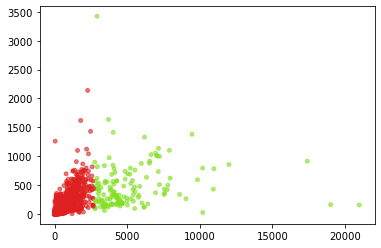

In [43]:


kmeans = KMeans(n_clusters=2, random_state=0)

live_clean['cluster'] = kmeans.fit_predict(live_clean[['num_comments',"num_shares"]])

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
live_clean['cen_x'] = live_clean.cluster.map({0:cen_x[0], 1:cen_x[1]})#, 2:cen_x[2]})
live_clean['cen_y'] = live_clean.cluster.map({0:cen_y[0], 1:cen_y[1]})#, 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
live_clean['c'] = live_clean.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
plt.scatter(live_clean.num_comments, live_clean.num_shares, c=live_clean.c, alpha = 0.6, s=15)

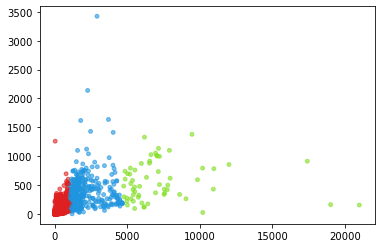

In [44]:
kmeans = KMeans(n_clusters=3, random_state=0)

live_clean['cluster'] = kmeans.fit_predict(live_clean[['num_comments',"num_shares"]])

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
live_clean['cen_x'] = live_clean.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
live_clean['cen_y'] = live_clean.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
live_clean['c'] = live_clean.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
plt.scatter(live_clean.num_comments, live_clean.num_shares, c=live_clean.c, alpha = 0.6, s=15)

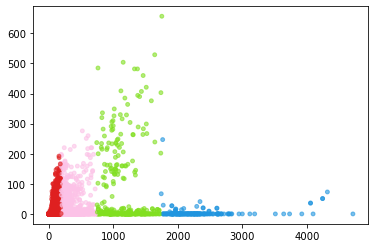

In [45]:
kmeans = KMeans(n_clusters=4, random_state=0)

live_clean['cluster'] = kmeans.fit_predict(live_clean[['num_likes',"num_loves"]])

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
live_clean['cen_x'] = live_clean.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3]})
live_clean['cen_y'] = live_clean.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_x[3]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', '#FCC2E7']
live_clean['c'] = live_clean.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})
plt.scatter(live_clean.num_likes, live_clean.num_loves, c=live_clean.c, alpha = 0.6, s=15)

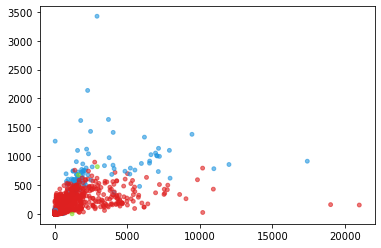

In [46]:
kmeans = KMeans(n_clusters=3, random_state=0)

live_clean['cluster'] = kmeans.fit_predict(live_clean[['num_likes',"num_shares"]])

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
live_clean['cen_x'] = live_clean.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
live_clean['cen_y'] = live_clean.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', '#FCC2E7']
live_clean['c'] = live_clean.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
plt.scatter(live_clean.num_comments, live_clean.num_shares, c=live_clean.c, alpha = 0.6, s=15)

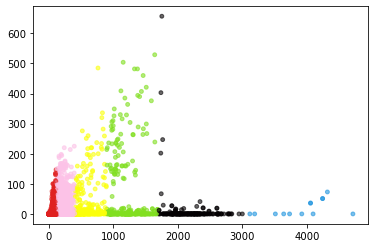

In [47]:
kmeans = KMeans(n_clusters=6, random_state=0)

live_clean['cluster'] = kmeans.fit_predict(live_clean[['num_likes',"num_loves"]])

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
live_clean['cen_x'] = live_clean.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4], 5:cen_x[5]})
live_clean['cen_y'] = live_clean.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_x[3], 4:cen_x[4], 5:cen_x[5]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', '#FCC2E7', "#030002", "#FBFF0B"]
live_clean['c'] = live_clean.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5]})
plt.scatter(live_clean.num_likes, live_clean.num_loves, c=live_clean.c, alpha = 0.6, s=15)

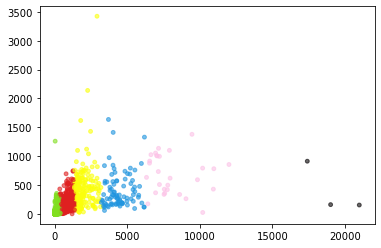

In [48]:
kmeans = KMeans(n_clusters=6, random_state=0)

live_clean['cluster'] = kmeans.fit_predict(live_clean[['num_comments',"num_shares"]])

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
live_clean['cen_x'] = live_clean.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4], 5:cen_x[5]})
live_clean['cen_y'] = live_clean.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_x[3], 4:cen_x[4], 5:cen_x[5]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', '#FCC2E7', "#030002", "#FBFF0B"]
live_clean['c'] = live_clean.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5]})
plt.scatter(live_clean.num_comments, live_clean.num_shares, c=live_clean.c, alpha = 0.6, s=15)

## Número otimo de clusters

For n_clusters=2, the silhouette score is 0.6237009613022017
For n_clusters=3, the silhouette score is 0.7011643250669356
For n_clusters=4, the silhouette score is 0.756943287885789
For n_clusters=5, the silhouette score is 0.7703917267686169
For n_clusters=6, the silhouette score is 0.7714700031607448
For n_clusters=7, the silhouette score is 0.7172959294642425
For n_clusters=8, the silhouette score is 0.715063569503421
For n_clusters=9, the silhouette score is 0.7057024081227955
For n_clusters=10, the silhouette score is 0.7141700284814297


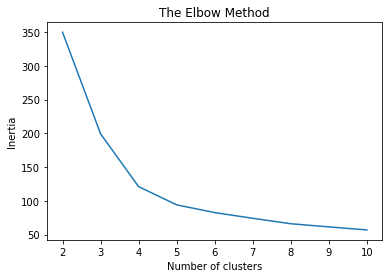

In [63]:


ms = MinMaxScaler()

X = ms.fit_transform(live_clean)

cs = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 7)

    kmeans.fit(X)
    
    cluster_labels = kmeans.labels_
    
    cs.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters={}, the silhouette score is {}".format(i, silhouette_avg))
# plot the 
plt.plot(range(2, 11), cs )
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [50]:
X

array([[ 0.32335035,  1.6868788 ],
       [-0.25220622, -0.3041444 ],
       [ 0.01308938,  0.12901714],
       ...,
       [-0.25220622, -0.3041444 ],
       [-0.23871662, -0.13695924],
       [-0.25220622, -0.3041444 ]])

### Questão 3

In [62]:
live_clean


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,0,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


In [58]:
X = live_clean[['num_likes',"num_loves"]]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.48272661,  1.98326643],
       [-0.14472021, -0.3184544 ],
       [-0.02457082,  0.2069384 ],
       ...,
       [-0.47624353, -0.29343569],
       [ 0.29805255, -0.26841699],
       [-0.44064371, -0.3184544 ]])

In [64]:
live_clean

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,0,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


In [1]:
# númro de comenta


ms = MinMaxScaler()

X = ms.fit_transform(live_clean)

dendrograma = dendrogram(linkage(X, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância Euclidiana')
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean')
previsoes = hc.fit_predict(X)

NameError: name 'MinMaxScaler' is not defined

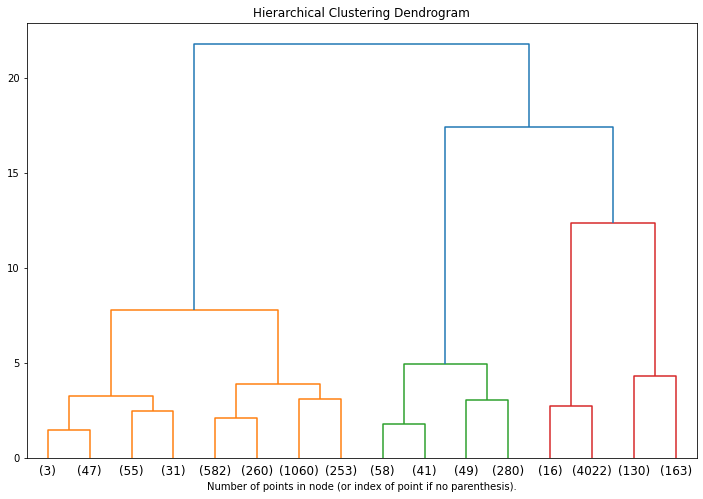

In [13]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

ms = MinMaxScaler()

X = ms.fit_transform(live_clean)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(12,8))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()